# Concrete Data: Exploring Concrete Compositions and Strength Characteristics

## **1. Problem description.**

---

The compressive strength of concrete is a very important property in civil engineering and prediciting this is very critical to the service life of the concrete structure. Compressive strength measures how much load a concrete mixture can withstand before failing (typically tested after 28 days of curing), and it directly influences the structural integrity, durability, and safety of buildings, bridges, and infrastructure. Accurately forecasting this property is essential for optimizing material formulations, reducing costs, minimizing waste, and ensuring compliance with building standards.Traditional methods rely on empirical formulas, lab experiments, or trial-and-error mixing, which are time-consuming, expensive, and limited in scalability. The dataset, sourced from a 1998 study by Yeh on high-performance concrete, provides experimental data from laboratory tests on various mixtures to enable data-driven predictions with ML models. It includes 1,030 samples with 8 input features representing mixture components and additives, and the concrete's compressive strength (in MPa, ranging from ~2 to ~82 MPa) as the target variable.

Key attributes within the dataset include:

Cement: The quantity of cement used in the concrete mixture, which serves as the binding agent.

Blast Furnace Slag: The amount of blast furnace slag, a supplementary cementitious material, included in the mixture to enhance durability and workability.

Fly Ash: The proportion of fly ash, another commonly used supplementary cementitious material, which contributes to improved strength and reduced environmental impact.

Water: The volume of water added to the mixture to achieve the desired consistency and hydration of cement particles.

Superplasticizer: The dosage of superplasticizer, an additive used to enhance workability and reduce water content while maintaining fluidity.

Coarse Aggregate: The quantity of coarse aggregate, typically gravel or crushed stone, included in the mixture to provide strength and stability.

Fine Aggregate: The amount of fine aggregate, such as sand or crushed stone dust, used to fill voids and improve cohesion in the concrete matrix.

Age (Days): The age of the concrete specimen at the time of testing, which influences its strength development over time.

Concrete Strength (MPa): The compressive strength of the concrete specimen, measured in megapascals (MPa), representing its ability to withstand axial loads.

## **2. How ML can help.**

---

Using ML, this problem can be transformed into a supervised regression problem. train models on the features to predict the compressive strength for new mixtures. This enables virtual experimentation, faster design iterations, and proactive quality control without physical tests. ML models can simulate thousands of trial mixes instantly, reducing lab trials by 50-80% in practice.
Also, techniques like hyperparameter tuning or genetic algorithms can find ideal mixtures for specific strength targets (e.g., eco-friendly low-cement formulas).

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "concrete_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zain280/concrete-data",
  file_path
)

/tmp/ipython-input-1643299171.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 57.6k/57.6k [00:00<00:00, 16.2MB/s]


## **3. Data preparation and EDA**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
# Make columns lowercase and replace space
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')


In [6]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None
cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64


In [7]:
print(df.describe().T)

                     count        mean         std     min      25%      50%  \
cement              1030.0  281.167864  104.506364  102.00  192.375  272.900   
blast_furnace_slag  1030.0   73.895825   86.279342    0.00    0.000   22.000   
fly_ash             1030.0   54.188350   63.997004    0.00    0.000    0.000   
water               1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplasticizer    1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarse_aggregate    1030.0  972.918932   77.753954  801.00  932.000  968.000   
fine_aggregate      1030.0  773.580485   80.175980  594.00  730.950  779.500   
age                 1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength            1030.0   35.817961   16.705742    2.33   23.710   34.445   

                         75%     max  
cement               350.000   540.0  
blast_furnace_slag   142.950   359.4  
fly_ash              118.300   200.1  
water                192.000   247.0  
supe

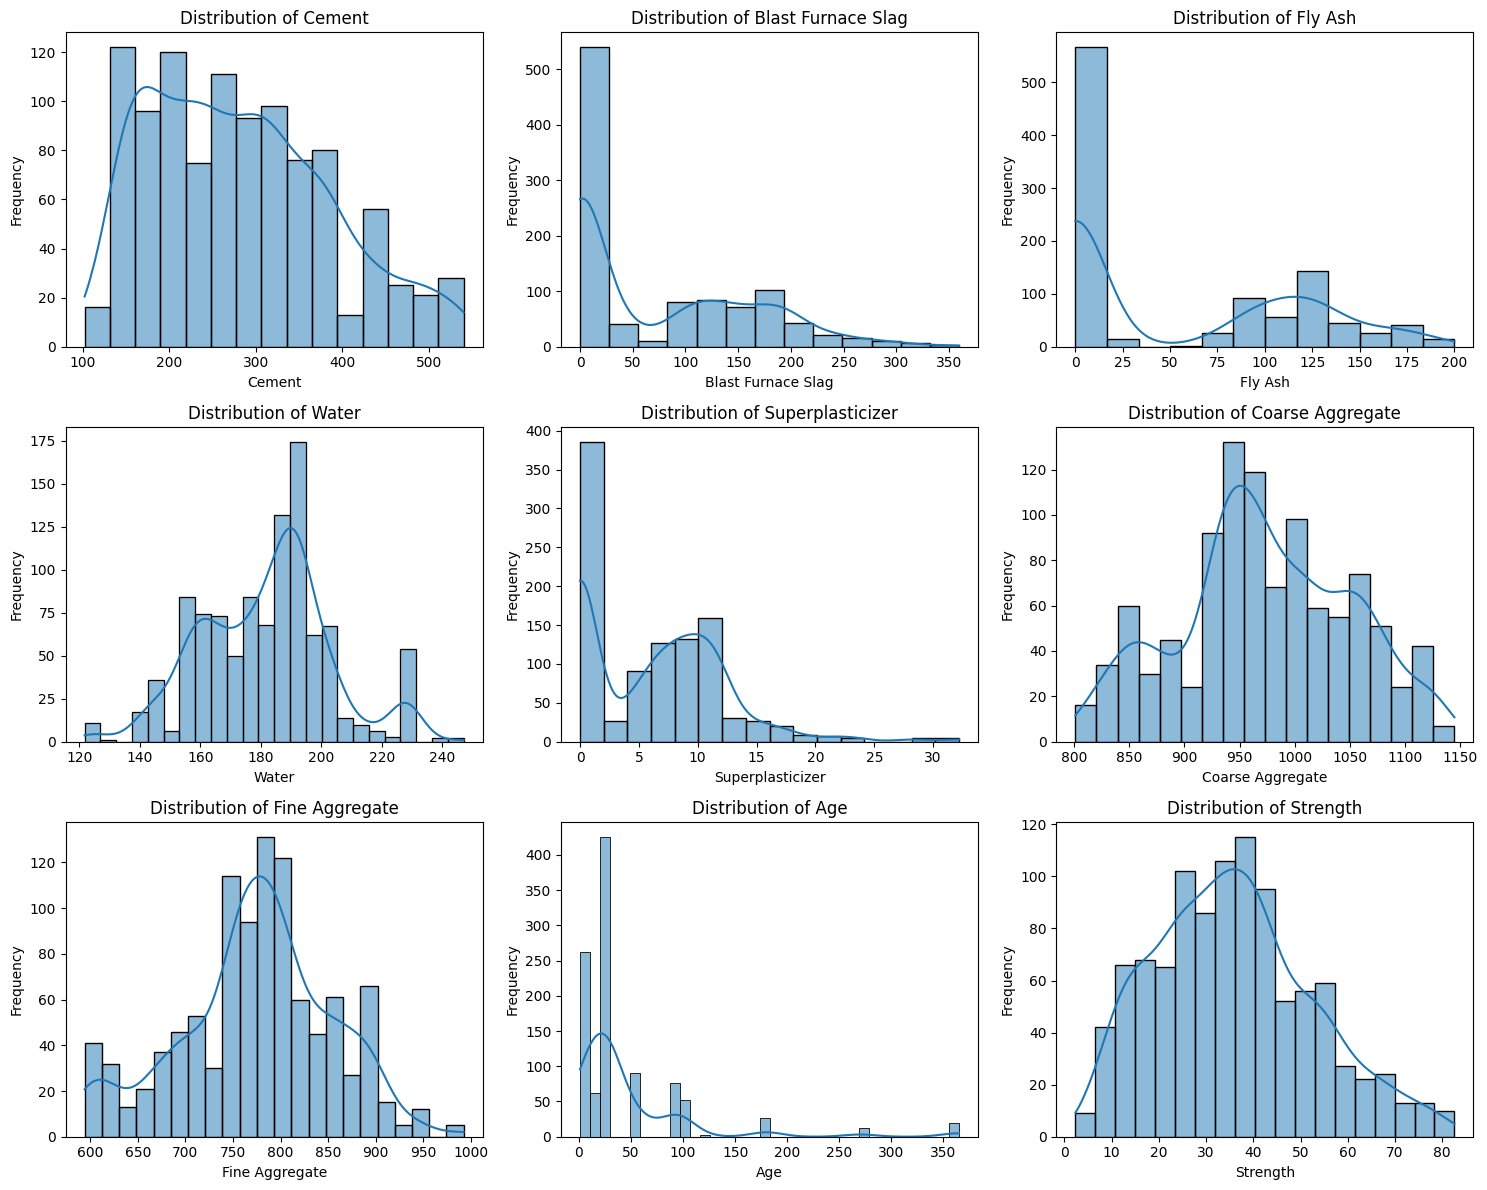

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Determine number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Feature distribution plots
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


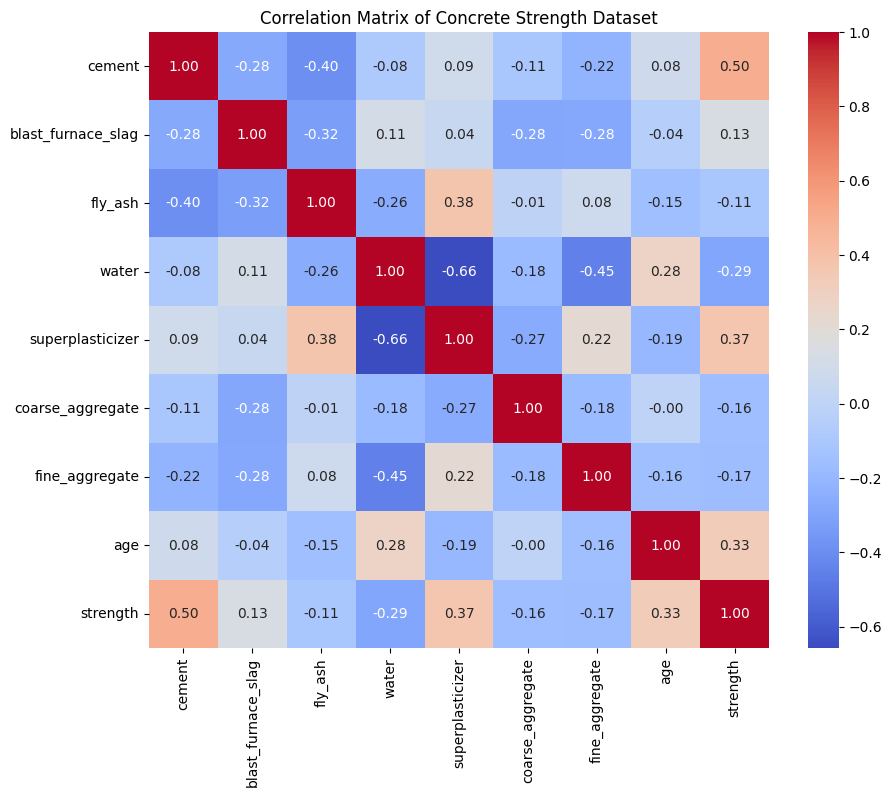

In [9]:
# Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Concrete Strength Dataset')
plt.show()

## **4. Model creation**

In [7]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
target = 'strength'
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]

X_val = df_val.drop(target, axis=1)
y_val = df_val[target]

X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (618, 8)
y_train shape: (618,)
X_val shape: (206, 8)
y_val shape: (206,)
X_test shape: (206, 8)
y_test shape: (206,)


In [13]:
del df_train['strength']
del df_val['strength']
del df_test['strength']

In [14]:
df_train.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,100
1,337.9,189.0,0.0,174.9,9.5,944.7,755.8,56
2,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,28
3,203.5,305.3,0.0,203.5,0.0,963.4,630.0,28
4,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28


Baseline Linear Regression

### 4.1. Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Decision Tree Regressor
dt= DecisionTreeRegressor(random_state=30)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=30)

In [16]:
# Make predictions on the validation set
y_pred_dt = dt.predict(X_val)

# Evaluate the model
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))
r2_dt = r2_score(y_val, y_pred_dt)

print(f"DT- Validation RMSE: {rmse_dt:.4f}")
print(f"DT- Validation R2: {r2_dt:.4f}")

DT- Validation RMSE: 6.8805
DT- Validation R2: 0.8311


#### 4.1.1 DT Parameter Tuning

In [17]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20]

for depth in depths:
    dt_regressor_tuned = DecisionTreeRegressor(max_depth=depth, random_state=30)
    dt_regressor_tuned.fit(X_train, y_train)

    y_pred_tuned = dt_regressor_tuned.predict(X_val)
    r2_tuned = r2_score(y_val, y_pred_tuned)

    print('Max Depth: %4s -> R2: %.3f' % (depth, r2_tuned))

Max Depth:    1 -> R2: 0.205
Max Depth:    2 -> R2: 0.508
Max Depth:    3 -> R2: 0.656
Max Depth:    4 -> R2: 0.706
Max Depth:    5 -> R2: 0.785
Max Depth:    6 -> R2: 0.810
Max Depth:   10 -> R2: 0.815
Max Depth:   15 -> R2: 0.839
Max Depth:   20 -> R2: 0.838


In [18]:
scores = []

for depth in [10, 15, 20]:
    for s in [1, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s, random_state=30)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        # rmse = np.sqrt(mean_squared_error(y_val, y_pred)) # Removed RMSE calculation
        r2 = r2_score(y_val, y_pred)

        scores.append((depth, s, r2))
        print('Max Depth: %4s, Min Samples Leaf: %4s -> R2: %.3f' % (depth, s, r2))

Max Depth:   10, Min Samples Leaf:    1 -> R2: 0.815
Max Depth:   10, Min Samples Leaf:    5 -> R2: 0.828
Max Depth:   10, Min Samples Leaf:   10 -> R2: 0.803
Max Depth:   10, Min Samples Leaf:   15 -> R2: 0.791
Max Depth:   10, Min Samples Leaf:   20 -> R2: 0.748
Max Depth:   10, Min Samples Leaf:  100 -> R2: 0.450
Max Depth:   10, Min Samples Leaf:  200 -> R2: 0.237
Max Depth:   10, Min Samples Leaf:  500 -> R2: -0.001
Max Depth:   15, Min Samples Leaf:    1 -> R2: 0.839
Max Depth:   15, Min Samples Leaf:    5 -> R2: 0.837
Max Depth:   15, Min Samples Leaf:   10 -> R2: 0.803
Max Depth:   15, Min Samples Leaf:   15 -> R2: 0.791
Max Depth:   15, Min Samples Leaf:   20 -> R2: 0.748
Max Depth:   15, Min Samples Leaf:  100 -> R2: 0.450
Max Depth:   15, Min Samples Leaf:  200 -> R2: 0.237
Max Depth:   15, Min Samples Leaf:  500 -> R2: -0.001
Max Depth:   20, Min Samples Leaf:    1 -> R2: 0.838
Max Depth:   20, Min Samples Leaf:    5 -> R2: 0.837
Max Depth:   20, Min Samples Leaf:   10 -> R

In [19]:
columns = ['max_depth', 'min_samples_leaf', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)

In [20]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['r2'])
df_scores_pivot.round(3)

r2              
max_depth            10     15     20
min_samples_leaf                     
1                 0.815  0.839  0.838
5                 0.828  0.837  0.837
10                0.803  0.803  0.803
15                0.791  0.791  0.791
20                0.748  0.748  0.748
100               0.450  0.450  0.450
200               0.237  0.237  0.237
500              -0.001 -0.001 -0.001

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

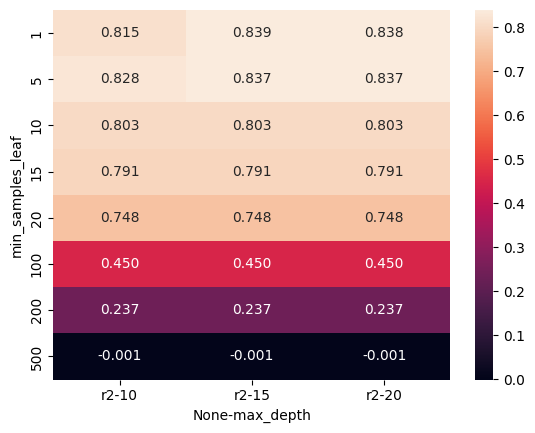

In [21]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [22]:
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=1, random_state=30)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=30)

In [23]:
y_pred_dt = dt.predict(X_val)
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))
r2_dt = r2_score(y_val, y_pred_dt)

In [24]:
print(f"DT_Val RMSE: {rmse_dt:.4f}")
print(f"DT_Val R2: {r2_dt:.4f}")

DT_Val RMSE: 6.7160
DT_Val R2: 0.8390


### 4.2. Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=30)
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_val)
    rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
    r2_rf = r2_score(y_val, y_pred_rf)

    scores.append((n,rmse_rf, r2_rf))

In [26]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse_rf', 'r2_rf'])

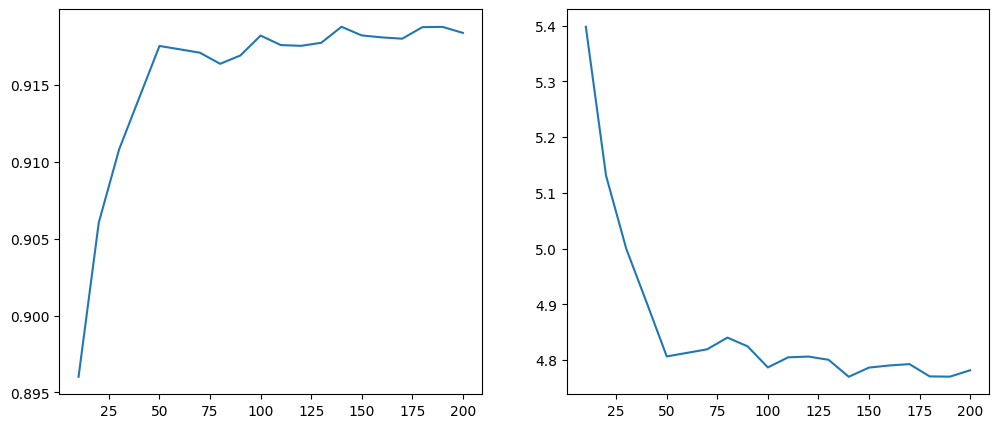

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # n_estimators-r2  plot
plt.plot(df_scores.n_estimators, df_scores.r2_rf)

plt.subplot(1, 2, 2) # n_estimators-rmse plot
plt.plot(df_scores.n_estimators, df_scores.rmse_rf)

plt.show()

In [28]:
scores = []

for d in [1, 2, 3, 4, 5, 6, 10, 15, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=30)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, r2, rmse))

In [29]:
columns = ['max_depth', 'n_estimators', 'r2', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

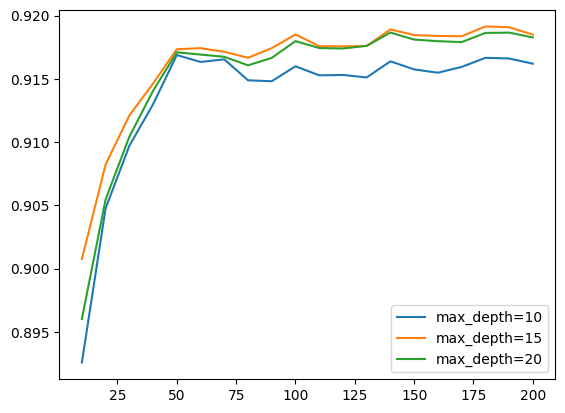

In [30]:
for d in [10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.r2,
             label='max_depth=%d' % d)

plt.legend()

In [31]:
max_depth =15

In [32]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=30)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((s, n, r2, rmse))

In [33]:
columns = ['min_samples_leaf', 'n_estimators', 'r2', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

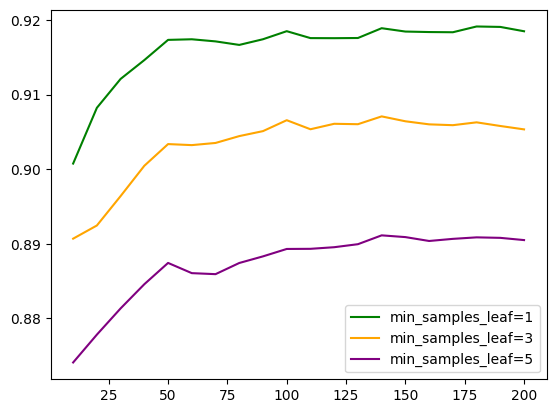

In [34]:
colors = ['green', 'orange', 'purple']
values = [1, 3, 5]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.r2,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [36]:
rf = RandomForestRegressor(n_estimators=180,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=30)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=180, random_state=30)

In [37]:
y_pred = rf.predict(X_val)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(r2, rmse)

0.9191417732713302 4.7600252731925465


In [38]:
# Bootstrap set to false
rf_boot = RandomForestRegressor(n_estimators=180,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=30, bootstrap=False)
rf_boot.fit(X_train, y_train)

y_pred = rf_boot.predict(X_val)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(r2, rmse)

# reduced performance than when "bootstrap=True"

0.8387530944626965 6.721912372703343


### 4.3. Extra Trees

In [39]:
from sklearn.ensemble import ExtraTreesRegressor

scores = []

for n in range(10, 201, 10):
    et = ExtraTreesRegressor(n_estimators=n, random_state=30)
    et.fit(X_train, y_train)

    y_pred_et = et.predict(X_val)
    rmse_et = np.sqrt(mean_squared_error(y_val, y_pred_et))
    r2_et = r2_score(y_val, y_pred_et)

    scores.append((n, rmse_et, r2_et))

df_scores_et = pd.DataFrame(scores, columns=['n_estimators', 'rmse_et', 'r2_et'])
print(df_scores_et.head())

   n_estimators   rmse_et     r2_et
0            10  4.446046  0.929457
1            20  4.396319  0.931026
2            30  4.403254  0.930808
3            40  4.362518  0.932083
4            50  4.313565  0.933598


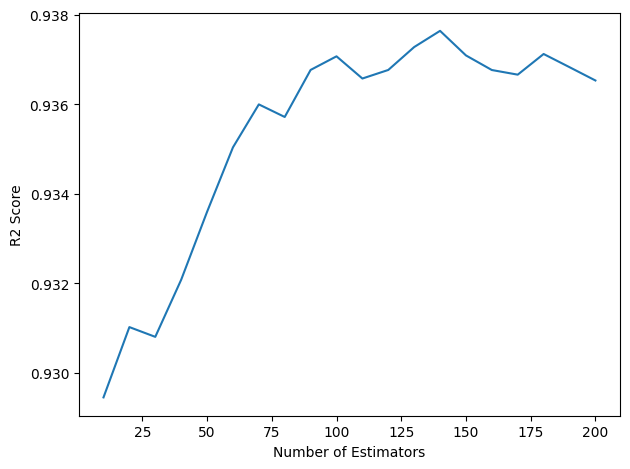

In [40]:
plt.plot(df_scores_et.n_estimators, df_scores_et.r2_et)
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')


plt.tight_layout()
plt.show()

In [41]:
scores = []

for d in [5, 10, 15, 20]:
    for n in range(50, 201, 50):
        et = ExtraTreesRegressor(n_estimators=n,
                                 max_depth=d,
                                 random_state=30)
        et.fit(X_train, y_train)

        y_pred = et.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, r2, rmse))

columns = ['max_depth', 'n_estimators', 'r2', 'rmse']
df_scores_et_depth_est = pd.DataFrame(scores, columns=columns)
print(df_scores_et_depth_est.head())

   max_depth  n_estimators        r2      rmse
0          5            50  0.808017  7.334635
1          5           100  0.804207  7.407061
2          5           150  0.806769  7.358430
3          5           200  0.806858  7.356747
4         10            50  0.924229  4.607855


In [42]:
scores = []

selected_max_depth = 15

for s in [1, 3, 5, 10, 15, 20]:
    for n in range(50, 201, 50):
        et = ExtraTreesRegressor(n_estimators=n,
                                 max_depth=selected_max_depth,
                                 min_samples_leaf=s,
                                 random_state=30)
        et.fit(X_train, y_train)

        y_pred = et.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((s, n, r2, rmse))

columns = ['min_samples_leaf', 'n_estimators', 'r2', 'rmse']
df_scores_et_min_samples = pd.DataFrame(scores, columns=columns)
print(df_scores_et_min_samples.head())

   min_samples_leaf  n_estimators        r2      rmse
0                 1            50  0.932609  4.345580
1                 1           100  0.933643  4.312103
2                 1           150  0.933674  4.311114
3                 1           200  0.934329  4.289760
4                 3            50  0.906760  5.111493


In [43]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


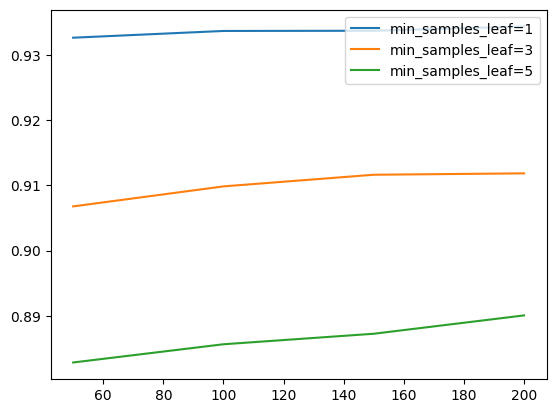

In [44]:
for s in [1,3,5]:
    df_subset = df_scores_et_min_samples[df_scores_et_min_samples.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.r2,
             label='min_samples_leaf=%d' % s)
plt.legend()
plt.show()

In [45]:
best_et_params = df_scores_et_min_samples.loc[df_scores_et_min_samples['r2'].idxmax()]

optimal_n_estimators = int(best_et_params['n_estimators'])
optimal_max_depth = selected_max_depth
optimal_min_samples_leaf = int(best_et_params['min_samples_leaf'])
optimal_r2 = best_et_params['r2']
optimal_rmse = best_et_params['rmse']

In [46]:
print(f"n_estimators: {optimal_n_estimators}")
print(f"max_depth: {optimal_max_depth}")
print(f"min_samples_leaf: {optimal_min_samples_leaf}")
print(f"R2 score: {optimal_r2:.4f}")
print(f"RMSE: {optimal_rmse:.4f}")

n_estimators: 200
max_depth: 15
min_samples_leaf: 1
R2 score: 0.9343
RMSE: 4.2898


In [47]:
scores = []

# Using optimal hyperparameters found from previous steps
optimal_n_estimators = 200
optimal_max_depth = 15
optimal_min_samples_leaf = 1

# Define a range of max_features to test
max_features_options = [0.5, 0.7, 1.0, 'sqrt', 'log2']

for mf in max_features_options:
    et = ExtraTreesRegressor(n_estimators=optimal_n_estimators,
                             max_depth=optimal_max_depth,
                             min_samples_leaf=optimal_min_samples_leaf,
                             max_features=mf,
                             random_state=30)
    et.fit(X_train, y_train)

    y_pred = et.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    scores.append((mf, r2, rmse))

columns = ['max_features', 'r2', 'rmse']
df_scores_et_max_features = pd.DataFrame(scores, columns=columns)
print(df_scores_et_max_features.head())

  max_features        r2      rmse
0          0.5  0.929098  4.457343
1          0.7  0.933182  4.327057
2          1.0  0.934329  4.289760
3         sqrt  0.882346  5.741825
4         log2  0.915618  4.862647


In [48]:
best_max_features_params = df_scores_et_max_features.loc[df_scores_et_max_features['r2'].idxmax()]

optimal_max_features = best_max_features_params['max_features']
optimal_r2_final = best_max_features_params['r2']
optimal_rmse_final = best_max_features_params['rmse']

print(f"max_features: {optimal_max_features}")
print(f"R2: {optimal_r2_final:.4f}")
print(f"RMSE: {optimal_rmse_final:.4f}")

max_features: 1.0
R2: 0.9343
RMSE: 4.2898


In [49]:
final_et_model = ExtraTreesRegressor(n_estimators=optimal_n_estimators,
                                     max_depth=optimal_max_depth,
                                     min_samples_leaf=optimal_min_samples_leaf,
                                     max_features=optimal_max_features,
                                     random_state=30)

final_et_model.fit(X_train, y_train)

y_pred_final_et = final_et_model.predict(X_val)

final_rmse_et = np.sqrt(mean_squared_error(y_val, y_pred_final_et))
final_r2_et = r2_score(y_val, y_pred_final_et)


In [50]:
print(f" n_estimators: {optimal_n_estimators}")
print(f"max_depth: {optimal_max_depth}")
print(f"min_samples_leaf: {optimal_min_samples_leaf}")
print(f"max_features: {optimal_max_features}")
print(f"RMSE: {final_rmse_et:.4f}")
print(f"R2: {final_r2_et:.4f}")

 n_estimators: 200
max_depth: 15
min_samples_leaf: 1
max_features: 1.0
RMSE: 4.2898
R2: 0.9343


### 4.4 XGBoost

In [52]:
import xgboost as xgb

features = list(X_train.columns)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [67]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.3,
    'max_depth': 8,
    'min_child_weight': 1,
    'seed': 30
}

xgboost_scores = []

for n in range(10, 201, 10):
    model = xgb.train(params, dtrain, num_boost_round=n, verbose_eval=False)

    # Predict on validation set
    y_pred_xgb_val = model.predict(dval)
    rmse_xgb_val = np.sqrt(mean_squared_error(y_val, y_pred_xgb_val))
    r2_xgb_val = r2_score(y_val, y_pred_xgb_val)

    # Predict on training set and calculate R2 for training
    y_pred_xgb_train = model.predict(dtrain)
    r2_xgb_train = r2_score(y_train, y_pred_xgb_train)

    xgboost_scores.append((n, rmse_xgb_val, r2_xgb_val, r2_xgb_train))
    print(f"n_estimators: {n}, Val RMSE: {rmse_xgb_val:.4f}, Val R2: {r2_xgb_val:.4f}, Train R2: {r2_xgb_train:.4f}")

df_xgboost_n_estimators = pd.DataFrame(xgboost_scores, columns=['n_estimators', 'rmse', 'r2', 'train_r2'])

n_estimators: 10, RMSE: 5.0439, R2: 0.9092
n_estimators: 20, RMSE: 4.7464, R2: 0.9196
n_estimators: 30, RMSE: 4.6766, R2: 0.9220
n_estimators: 40, RMSE: 4.6390, R2: 0.9232
n_estimators: 50, RMSE: 4.6244, R2: 0.9237
n_estimators: 60, RMSE: 4.6222, R2: 0.9238
n_estimators: 70, RMSE: 4.6209, R2: 0.9238
n_estimators: 80, RMSE: 4.6169, R2: 0.9239
n_estimators: 90, RMSE: 4.6158, R2: 0.9240
n_estimators: 100, RMSE: 4.6156, R2: 0.9240
n_estimators: 110, RMSE: 4.6152, R2: 0.9240
n_estimators: 120, RMSE: 4.6155, R2: 0.9240
n_estimators: 130, RMSE: 4.6157, R2: 0.9240
n_estimators: 140, RMSE: 4.6158, R2: 0.9240
n_estimators: 150, RMSE: 4.6155, R2: 0.9240
n_estimators: 160, RMSE: 4.6155, R2: 0.9240
n_estimators: 170, RMSE: 4.6156, R2: 0.9240
n_estimators: 180, RMSE: 4.6156, R2: 0.9240
n_estimators: 190, RMSE: 4.6156, R2: 0.9240
n_estimators: 200, RMSE: 4.6156, R2: 0.9240


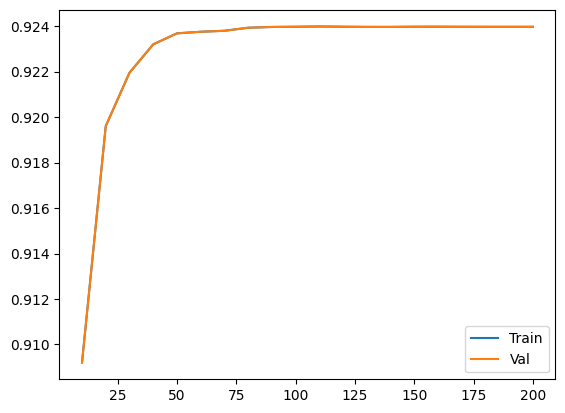

In [73]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(df_xgboost_n_estimators.n_estimators, df_xgboost_n_estimators.r2, label='Train')
plt.plot(df_xgboost_n_estimators.n_estimators, df_xgboost_n_estimators.r2, label='Val')
plt.legend()
plt.show()

In [71]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.3,
    'max_depth': 8,
    'min_child_weight': 1,
    'seed': 30
}

xgboost_scores = []

for n in range(10, 201, 10):
    model = xgb.train(params, dtrain, num_boost_round=n, verbose_eval=False)

    # Predict on validation set
    y_pred_xgb_val = model.predict(dval)
    rmse_xgb_val = np.sqrt(mean_squared_error(y_val, y_pred_xgb_val))
    r2_xgb_val = r2_score(y_val, y_pred_xgb_val)

    # Predict on training set and calculate R2 for training
    y_pred_xgb_train = model.predict(dtrain)
    r2_xgb_train = r2_score(y_train, y_pred_xgb_train)

    xgboost_scores.append((n, rmse_xgb_val, r2_xgb_val, r2_xgb_train))
    print(f"n_estimators: {n}, Val RMSE: {rmse_xgb_val:.4f}, Val R2: {r2_xgb_val:.4f}, Train R2: {r2_xgb_train:.4f}")

df_xgboost_n_estimators = pd.DataFrame(xgboost_scores, columns=['n_estimators', 'rmse', 'r2', 'train_r2'])

n_estimators: 10, Val RMSE: 5.0439, Val R2: 0.9092, Train R2: 0.9848
n_estimators: 20, Val RMSE: 4.7464, Val R2: 0.9196, Train R2: 0.9936
n_estimators: 30, Val RMSE: 4.6766, Val R2: 0.9220, Train R2: 0.9948
n_estimators: 40, Val RMSE: 4.6390, Val R2: 0.9232, Train R2: 0.9952
n_estimators: 50, Val RMSE: 4.6244, Val R2: 0.9237, Train R2: 0.9953
n_estimators: 60, Val RMSE: 4.6222, Val R2: 0.9238, Train R2: 0.9954
n_estimators: 70, Val RMSE: 4.6209, Val R2: 0.9238, Train R2: 0.9954
n_estimators: 80, Val RMSE: 4.6169, Val R2: 0.9239, Train R2: 0.9954
n_estimators: 90, Val RMSE: 4.6158, Val R2: 0.9240, Train R2: 0.9954
n_estimators: 100, Val RMSE: 4.6156, Val R2: 0.9240, Train R2: 0.9954
n_estimators: 110, Val RMSE: 4.6152, Val R2: 0.9240, Train R2: 0.9954
n_estimators: 120, Val RMSE: 4.6155, Val R2: 0.9240, Train R2: 0.9954
n_estimators: 130, Val RMSE: 4.6157, Val R2: 0.9240, Train R2: 0.9954
n_estimators: 140, Val RMSE: 4.6158, Val R2: 0.9240, Train R2: 0.9954
n_estimators: 150, Val RMSE: 

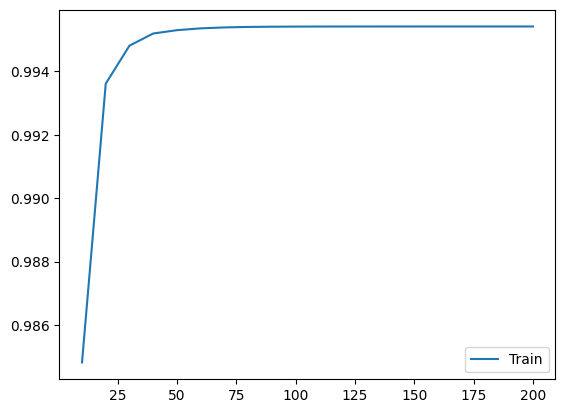

In [77]:
plt.plot(df_xgboost_n_estimators.n_estimators, df_xgboost_n_estimators.train_r2, label='Train')
plt.plot(df_xgboost_n_estimators.n_estimators, df_xgboost_n_estimators.r2, label='Validation', color='orange')
plt.legend()
plt.show()

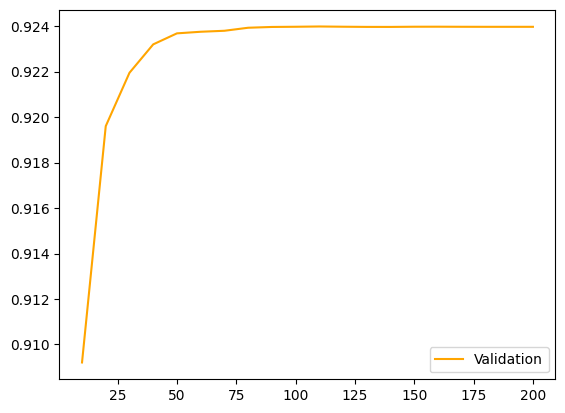

In [78]:
plt.plot(df_xgboost_n_estimators.n_estimators, df_xgboost_n_estimators.r2, label='Validation', color='orange')
plt.legend()
plt.show()

#### 4.4.1 Parameter Tuning

In [79]:
xgboost_scores = []

max_depth_values = [3, 5, 7, 10]
min_child_weight_values = [1, 3, 5, 10]

for depth in max_depth_values:
    for min_weight in min_child_weight_values:
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'eta': 0.3,
            'max_depth': depth,
            'min_child_weight': min_weight,
            'seed': 30
        }

        model = xgb.train(params, dtrain, num_boost_round=100, verbose_eval=False)

        y_pred_xgb_val = model.predict(dval)
        rmse_xgb_val = np.sqrt(mean_squared_error(y_val, y_pred_xgb_val))
        r2_xgb_val = r2_score(y_val, y_pred_xgb_val)

        xgboost_scores.append((depth, min_weight, rmse_xgb_val, r2_xgb_val))

df_xgboost_tuned = pd.DataFrame(xgboost_scores, columns=['max_depth', 'min_child_weight', 'rmse', 'r2'])
print(df_xgboost_tuned.head())

   max_depth  min_child_weight      rmse        r2
0          3                 1  4.649676  0.922847
1          3                 3  4.649485  0.922854
2          3                 5  4.762563  0.919056
3          3                10  4.802017  0.917709
4          5                 1  4.369237  0.931873


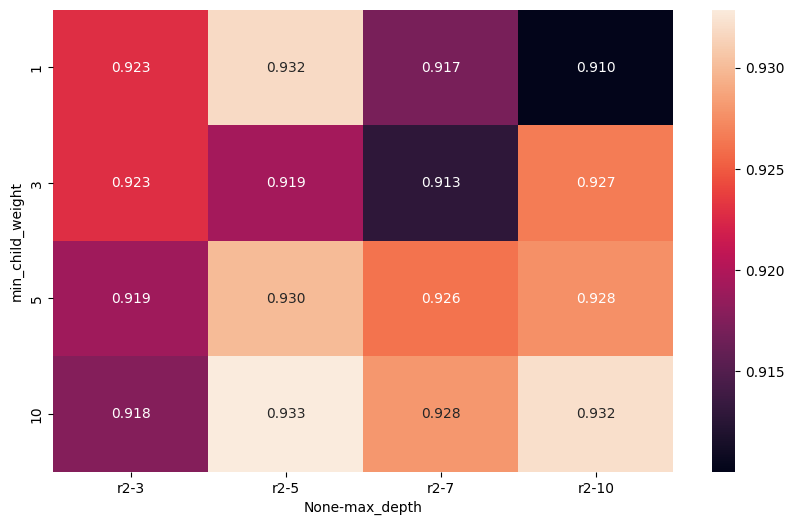

In [84]:
df_scores_pivot_r2 = df_xgboost_tuned.pivot(index='min_child_weight', columns=['max_depth'], values=['r2'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_scores_pivot_r2, annot=True, fmt=".3f")
plt.show()

In [87]:
xgboost_scores = []

optimal_max_depth = 5  # From previous tuning step
optimal_min_child_weight = 10 # From previous tuning step
colsample_bytree_values = [0.6, 0.7, 0.8, 0.9, 1.0]

for colsample in colsample_bytree_values:
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': 0.3,
        'max_depth': optimal_max_depth,
        'min_child_weight': optimal_min_child_weight,
        'colsample_bytree': colsample,
        'seed': 30
    }

    model = xgb.train(params, dtrain, num_boost_round=100, verbose_eval=False)

    y_pred_xgb_val = model.predict(dval)
    rmse_xgb_val = np.sqrt(mean_squared_error(y_val, y_pred_xgb_val))
    r2_xgb_val = r2_score(y_val, y_pred_xgb_val)

    xgboost_scores.append((colsample, rmse_xgb_val, r2_xgb_val))

df_xgboost_colsample = pd.DataFrame(xgboost_scores, columns=['colsample_bytree', 'rmse', 'r2'])
print(df_xgboost_colsample.head())

   colsample_bytree      rmse        r2
0               0.6  4.977676  0.911578
1               0.7  4.543176  0.926341
2               0.8  4.702762  0.921076
3               0.9  4.572868  0.925375
4               1.0  4.337447  0.932861


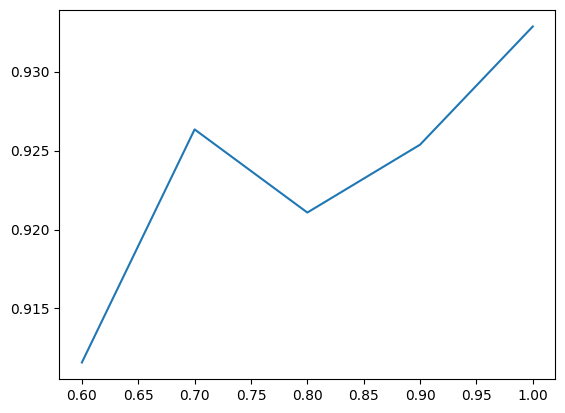

In [101]:
plt.plot(df_xgboost_colsample.colsample_bytree, df_xgboost_colsample.r2)
plt.show()

In [89]:
xgboost_scores = []

optimal_max_depth = 5
optimal_min_child_weight = 10
optimal_colsample_bytree = 1.0

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.3,
    'max_depth': optimal_max_depth,
    'min_child_weight': optimal_min_child_weight,
    'colsample_bytree': optimal_colsample_bytree,
    'seed': 30
}

for n in range(10, 201, 10):
    model = xgb.train(params, dtrain, num_boost_round=n, verbose_eval=False)

    y_pred_xgb_val = model.predict(dval)
    rmse_xgb_val = np.sqrt(mean_squared_error(y_val, y_pred_xgb_val))
    r2_xgb_val = r2_score(y_val, y_pred_xgb_val)

    xgboost_scores.append((n, rmse_xgb_val, r2_xgb_val))

df_xgboost_n_estimators_tuned = pd.DataFrame(xgboost_scores, columns=['n_estimators', 'rmse', 'r2'])
print(df_xgboost_n_estimators_tuned.head())

   n_estimators      rmse        r2
0            10  5.343286  0.898112
1            20  4.856204  0.915841
2            30  4.630387  0.923486
3            40  4.576781  0.925247
4            50  4.538718  0.926486


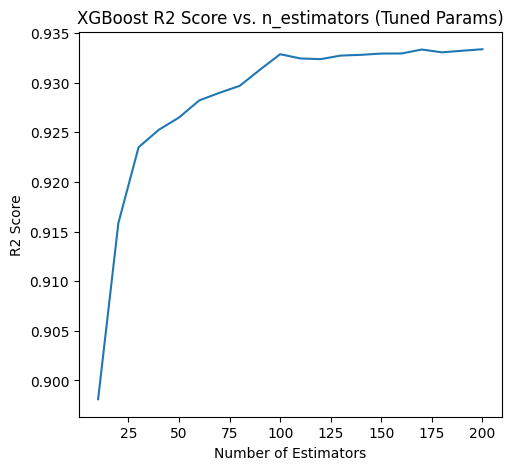

In [90]:
plt.plot(df_xgboost_n_estimators_tuned.n_estimators, df_xgboost_n_estimators_tuned.r2)
plt.title('XGBoost R2 vs. n_estimators (Tuned Params)')
plt.xlabel('Number of Estimators')
plt.ylabel('R2')

plt.show()

In [91]:
xgboost_scores = []

optimal_max_depth = 5
optimal_min_child_weight = 10
optimal_colsample_bytree = 1.0

lambda_values = [0.01, 0.1, 1, 10, 100]

for current_lambda in lambda_values:
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': 0.3,
        'max_depth': optimal_max_depth,
        'min_child_weight': optimal_min_child_weight,
        'colsample_bytree': optimal_colsample_bytree,
        'lambda': current_lambda,
        'seed': 30
    }

    model = xgb.train(params, dtrain, num_boost_round=100, verbose_eval=False)

    y_pred_xgb_val = model.predict(dval)
    rmse_xgb_val = np.sqrt(mean_squared_error(y_val, y_pred_xgb_val))
    r2_xgb_val = r2_score(y_val, y_pred_xgb_val)

    xgboost_scores.append((current_lambda, rmse_xgb_val, r2_xgb_val))

df_xgboost_lambda = pd.DataFrame(xgboost_scores, columns=['lambda', 'rmse', 'r2'])
print(df_xgboost_lambda.head())

   lambda      rmse        r2
0    0.01  4.635338  0.923322
1    0.10  4.423861  0.930159
2    1.00  4.337447  0.932861
3   10.00  4.750868  0.919453
4  100.00  4.719094  0.920526


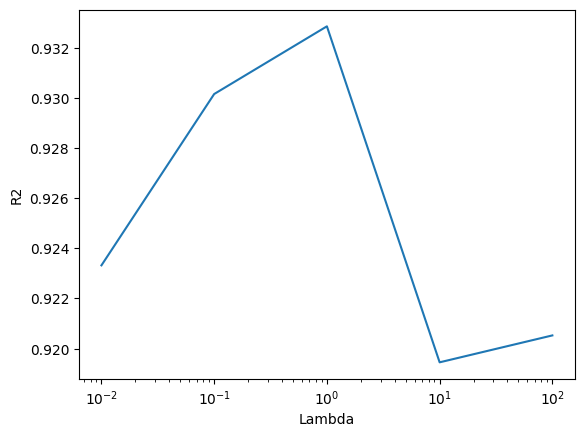

In [104]:
plt.plot(df_xgboost_lambda['lambda'], df_xgboost_lambda['r2'])
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('R2')

plt.show()

In [93]:
xgboost_scores = []

optimal_max_depth = 5
optimal_min_child_weight = 10
optimal_colsample_bytree = 1.0
optimal_lambda = 1.0 # From previous tuning step

eta_values = [0.01, 0.05, 0.1, 0.2, 0.3]

for current_eta in eta_values:
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': current_eta,
        'max_depth': optimal_max_depth,
        'min_child_weight': optimal_min_child_weight,
        'colsample_bytree': optimal_colsample_bytree,
        'lambda': optimal_lambda,
        'seed': 30
    }

    model = xgb.train(params, dtrain, num_boost_round=100, verbose_eval=False)

    y_pred_xgb_val = model.predict(dval)
    rmse_xgb_val = np.sqrt(mean_squared_error(y_val, y_pred_xgb_val))
    r2_xgb_val = r2_score(y_val, y_pred_xgb_val)

    xgboost_scores.append((current_eta, rmse_xgb_val, r2_xgb_val))

df_xgboost_eta = pd.DataFrame(xgboost_scores, columns=['eta', 'rmse', 'r2'])
print(df_xgboost_eta.head())

    eta      rmse        r2
0  0.01  8.952965  0.713952
1  0.05  4.938661  0.912959
2  0.10  4.735431  0.919975
3  0.20  4.593628  0.924696
4  0.30  4.337447  0.932861


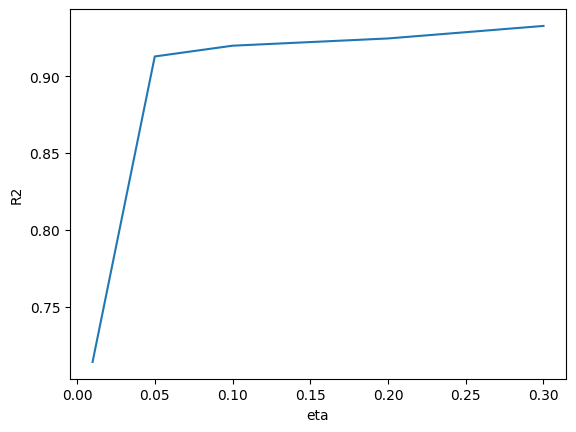

In [103]:
plt.plot(df_xgboost_eta.eta, df_xgboost_eta.r2)
plt.xlabel('eta')
plt.ylabel('R2')

plt.show()

In [112]:
final_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.3,
    'max_depth': 5,
    'min_child_weight': 10,
    'colsample_bytree': 1.0,
    'lambda': 1.0,
    'seed': 30
}

optimal_num_boost_round = 100

final_xgboost_model = xgb.train(final_params, dtrain, num_boost_round=optimal_num_boost_round, verbose_eval=False)

y_pred_final_xgb = final_xgboost_model.predict(dval)

final_rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_final_xgb))
final_r2_xgb = r2_score(y_val, y_pred_final_xgb)

print(f"{final_rmse_xgb:.4f}, {final_r2_xgb:.4f}")

4.3374, 0.9329


In [96]:
y_pred_final_xgb = final_xgboost_model.predict(dval)

final_rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_final_xgb))
final_r2_xgb = r2_score(y_val, y_pred_final_xgb)

print(f"Final XGBoost Model Validation RMSE: {final_rmse_xgb:.4f}")
print(f"Final XGBoost Model Validation R2: {final_r2_xgb:.4f}")

Final XGBoost Model Validation RMSE: 4.3374
Final XGBoost Model Validation R2: 0.9329


### 4.5 Final Model Selection

In this notebook, 4 models were selected and their parameters tuned to determine the best performing model. In the follwing cells, these models are intantiated with their best configurations, and the predictions are assessed based on the r2 and RMSE.

In [113]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=1, random_state=30)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_val)
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))
r2_dt = r2_score(y_val, y_pred_dt)

print(f"DT_Val RMSE: {rmse_dt:.4f}")
print(f"DT_Val R2: {r2_dt:.4f}")

DT_Val RMSE: 6.7160
DT_Val R2: 0.8390


In [114]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=180,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=30)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(r2, rmse)

0.9191417732713302 4.7600252731925465


In [115]:
# Extra Trees Model
final_et_model = ExtraTreesRegressor(n_estimators=200,
                                     max_depth=15,
                                     min_samples_leaf=1,
                                     max_features=1.0,
                                     random_state=30)

final_et_model.fit(X_train, y_train)

y_pred_final_et = final_et_model.predict(X_val)

final_rmse_et = np.sqrt(mean_squared_error(y_val, y_pred_final_et))
final_r2_et = r2_score(y_val, y_pred_final_et)

print(final_rmse_et, final_r2_et)

4.289759776469543 0.934329300702582


In [116]:
# XGBoost Model
final_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.3,
    'max_depth': 5,
    'min_child_weight': 10,
    'colsample_bytree': 1.0,
    'lambda': 1.0,
    'seed': 30
}

optimal_num_boost_round = 100

final_xgboost_model = xgb.train(final_params, dtrain, num_boost_round=optimal_num_boost_round, verbose_eval=False)

y_pred_final_xgb = final_xgboost_model.predict(dval)

final_rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_final_xgb))
final_r2_xgb = r2_score(y_val, y_pred_final_xgb)

print(f"{final_rmse_xgb:.4f}, {final_r2_xgb:.4f}")

4.3374, 0.9329


The best model selected is the Extra Trees model with r2 = 0.9348 and RMSE = 4.2898, and this slightly above the XGBoost model with r2 = 0.9329 and RMSE = 4.3374.

In [117]:
import pickle

# Define the filename for the saved model
model_filename = 'final_xgboost_model.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(final_xgboost_model, file)

print(f"Final XGBoost model saved successfully as {model_filename}")

Final XGBoost model saved successfully as final_xgboost_model.pkl


## **5**. Training with K-Fold

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

# Define the number of splits for KFold
n_splits = 5  # You can change this number
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

rmse_scores = []
r2_scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train_fold = df_full_train.iloc[train_idx]
    df_val_fold = df_full_train.iloc[val_idx]

    # Separate features and target for the current fold
    X_train_fold = df_train_fold.drop('strength', axis=1)
    y_train_fold = df_train_fold['strength']

    X_val_fold = df_val_fold.drop('strength', axis=1)
    y_val_fold = df_val_fold['strength']

    # Train the Extra Trees Regressor model for the current fold
    model_fold = ExtraTreesRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_leaf=1,
        max_features=1.0,
        random_state=30
    )
    model_fold.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set of the current fold
    y_pred_fold = model_fold.predict(X_val_fold)

    # Calculate RMSE and R2
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    r2_fold = r2_score(y_val_fold, y_pred_fold)

    rmse_scores.append(rmse_fold)
    r2_scores.append(r2_fold)

print(f'KFold Cross-Validation Results (n_splits={n_splits}):')
print(f'Mean RMSE: {np.mean(rmse_scores):.4f} +- {np.std(rmse_scores):.4f}')
print(f'Mean R2: {np.mean(r2_scores):.4f} +- {np.std(r2_scores):.4f}')

KFold Cross-Validation Results (n_splits=5):
Mean RMSE: 5.3317 +- 0.5807
Mean R2: 0.9004 +- 0.0145
